# predict diabetes using PIMA diabetes dataset

In [1]:
#### Importing Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [45]:
data = pd.read_csv('pima_diabetes.csv')

In [46]:
data.shape

(768, 9)

In [47]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
data = data.rename(columns = {'Outcome':'Diabetes'})

In [49]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
### check the null vlaues
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

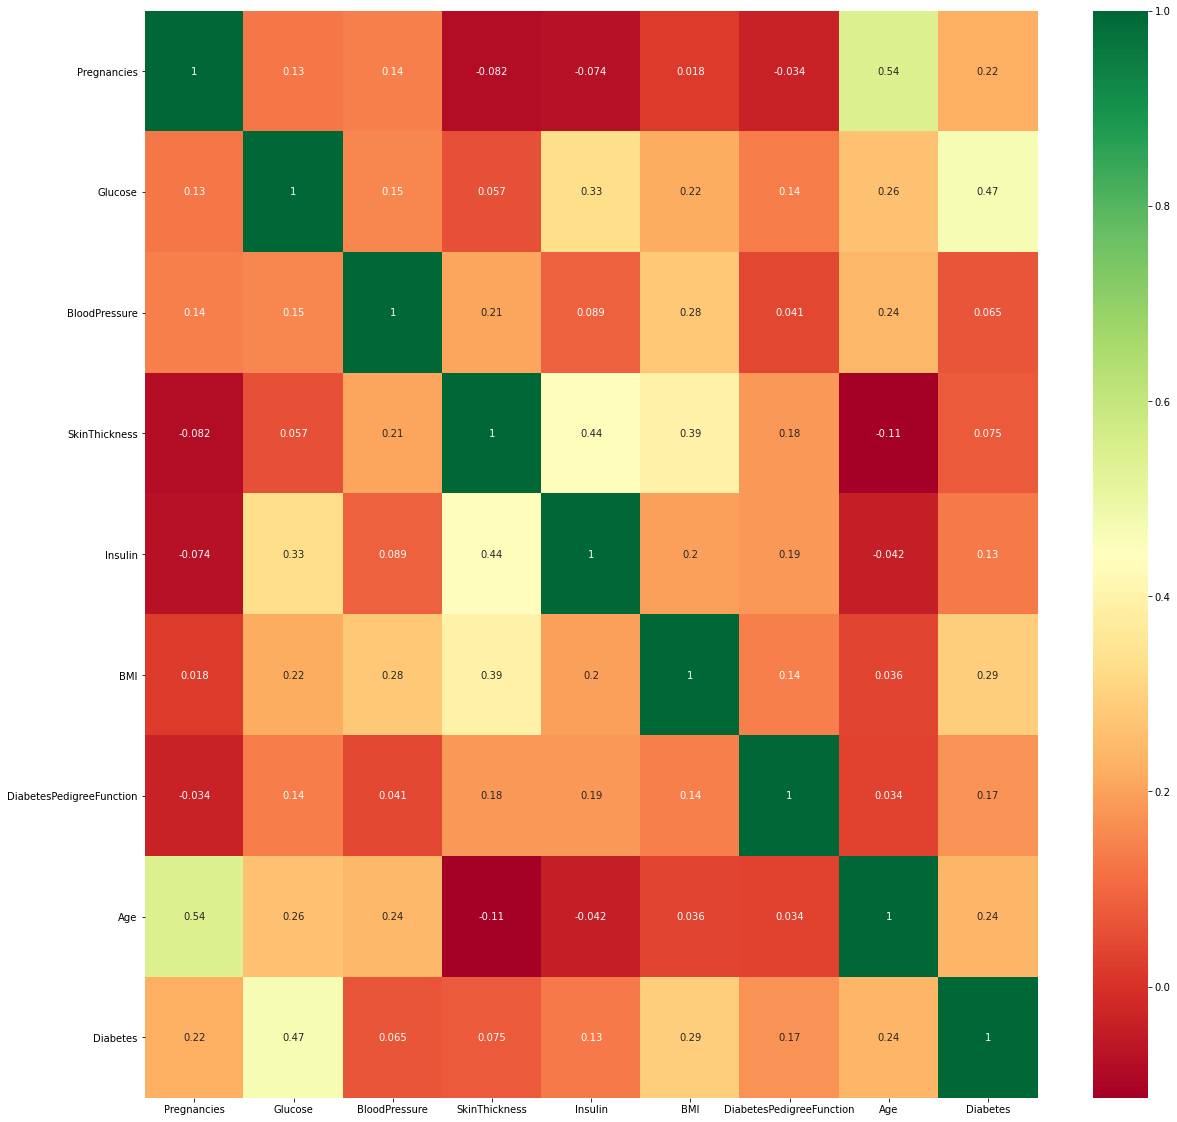

In [51]:
## Correlation of each feature
import seaborn as sns
import matplotlib.pyplot as plt
corrmat =  data.corr()
top_corr_feaatures = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_feaatures].corr(),annot=True,cmap='RdYlGn')

In [52]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [112]:
data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [55]:
diabetes_true_count = len(data.loc[data['Diabetes'] == 1])
diabetes_false_count = len(data.loc[data['Diabetes'] == 0])

In [56]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [57]:
# Train Test split
from sklearn.model_selection import train_test_split

In [83]:
X = data.drop(columns='Diabetes')
y = data['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

#### Check how many other missing(zero) values

In [84]:
print("total number of rows:{0}".format(len(data)))
print("number of rows missing glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))

total number of rows:768
number of rows missing glucose: 5
number of rows missing Pregnancies: 111
number of rows missing BloodPressure: 35
number of rows missing SkinThickness: 227
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [85]:
from sklearn.impute import SimpleImputer

In [86]:
fill_values = SimpleImputer(missing_values=0,strategy='mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [90]:
### Apply Algorithem
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

In [91]:
random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [94]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.753


In [111]:
#creating pickle file for the classifier
import pickle
filename = 'pima_diabetes-predicion-rf.pkl'
pickle.dump(random_forest_model, open(filename, 'wb'))